In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy as BCE
from matplotlib import pyplot as plt
from IPython import display
import numpy as np

In [48]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0 #normalization to improve training
x_test = x_test/255.0

In [49]:
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(32),
    LR(),
    Dropout(0.5),
    Dense(10, activation="sigmoid"),
])

In [50]:
decoder = Sequential([
    Dense(32, input_shape = (10,)),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

In [51]:
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss=BCE())

In [52]:
model.fit(x_train, x_train, batch_size = 64,epochs=20)

Epoch 1/20
938/938 [==============================] - 15s 13ms/step - loss: 0.2588
Epoch 2/20
938/938 [==============================] - 13s 14ms/step - loss: 0.2367
Epoch 3/20
938/938 [==============================] - 13s 14ms/step - loss: 0.2280
Epoch 4/20
938/938 [==============================] - 13s 14ms/step - loss: 0.2220
Epoch 5/20
938/938 [==============================] - 12s 13ms/step - loss: 0.2185
Epoch 6/20
938/938 [==============================] - 12s 13ms/step - loss: 0.2162
Epoch 7/20
938/938 [==============================] - 12s 13ms/step - loss: 0.2148
Epoch 8/20
938/938 [==============================] - 13s 14ms/step - loss: 0.2140
Epoch 9/20
938/938 [==============================] - 13s 14ms/step - loss: 0.2133
Epoch 10/20
938/938 [==============================] - 13s 14ms/step - loss: 0.2126
Epoch 11/20
938/938 [==============================] - 13s 14ms/step - loss: 0.2121
Epoch 12/20
938/938 [==============================] - 13s 14ms/step - loss: 0.2117
E

In [53]:
p = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


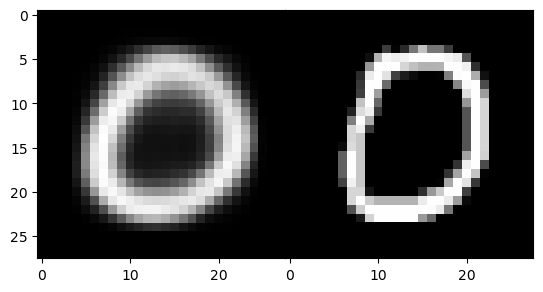

In [54]:
fig, axs = plt.subplots(1, 2)
i=10
axs[0].imshow(p[i], cmap = "gray")
axs[1].imshow(x_test[i], cmap = "gray")
plt.subplots_adjust(wspace = 0, hspace = 0)
plt.show()

In [55]:
x_train_enc = encoder.predict(x_train)
x_test_enc = encoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [56]:
np.savetxt('x_train_enc.txt', x_train_enc)

In [57]:
np.savetxt('x_test_enc.txt', x_test_enc)